# BackPropagation

In [1]:
import numpy as np
import pandas as pd
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

## 1. Loading data

In [2]:
import pickle
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


## 2. Computational Graph

<img src='https://i.imgur.com/seSGbNS.png'>

# Task 1: Implementing backpropagation and Gradient checking 

# foreward propogation

In [3]:
def sigmoid_function(x): 
    return 1.0 / (1 + np.exp(-x))

In [4]:
def grader_sigmoid(z):
  val=sigmoid_function(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

In [5]:
def foreward_propagation(Xi, yi, wi):
    hidden_dict = {}
    result_dict = {}
    
    result_dict["o1"] = wi[0] * Xi[0]  
    result_dict["o2"] = wi[1] * Xi[1]
    result_dict["o3"] = result_dict["o1"]+result_dict["o2"]
    result_dict["o4"] = result_dict["o3"] ** 2
    result_dict["o5"] = result_dict["o4"]+wi[5]
    result_dict["o6"] = np.exp(result_dict["o5"])
    exp = result_dict["o6"]
    result_dict["o7"] = result_dict["o6"] + wi[6]
    result_dict["o8"] = math.tanh(result_dict["o7"])
    tanh= result_dict["o8"]
    result_dict["o9"] = wi[2] * Xi[2]
    result_dict["o10"] = wi[3] * Xi[3]
    result_dict["o11"] = wi[4] * Xi[4]
    result_dict["o12"] = math.sin(result_dict["o9"])
    result_dict["o13"] = result_dict["o10"] + result_dict["o11"]
    result_dict["o14"] = result_dict["o12"] * result_dict["o13"]
    result_dict["o15"] = result_dict["o14"] + wi[7]
    result_dict["o16"] = sigmoid_function(result_dict["o15"])
    sigmoid = result_dict["o16"]
    result_dict["o17"] = result_dict["o16"] * wi[8]
    y_pred = result_dict["o8"] + result_dict["o17"]
    L_loss = (yi - y_pred)**2 
    dl = -2 * ( yi-y_pred)
    result_dict['dl'] = dl
    
    hidden_dict['dl'] = dl
    hidden_dict['loss'] = L_loss
    hidden_dict['exp'] = exp
    hidden_dict['tanh'] = tanh
    hidden_dict['sigmoid'] = sigmoid
    
    return L_loss , hidden_dict , result_dict    

In [6]:
w = np.ones(9)*0.1
loss,foreward_dict,output_dict = foreward_propagation(X[0], y[0], w)
foreward_dict

{'dl': -1.9285278284819143,
 'loss': 0.9298048963072919,
 'exp': 1.1272967040973583,
 'tanh': 0.8417934192562146,
 'sigmoid': 0.5279179387419721}

## grader function - I

In [7]:
def grader_forwardprop(data):
    dl = (np.round(data['dl'],4)==-1.9285)
    loss=(np.round(data['loss'],4)==0.9298)
    part1=(np.round(data['exp'],4)==1.1273)
    part2=(np.round(data['tanh'],4)==0.8418)
    part3=(np.round(data['sigmoid'],4)==0.5279)
    assert(dl and loss and part1 and part2 and part3)
    return True

In [8]:
w=np.ones(9)*0.1
_,d1,_=foreward_propagation(X[0],y[0],w)
grader_forwardprop(d1)

True

# backward proagation

In [9]:
# derivative of sigmoid activation function
def derivative_sigmoid(x):
    return sigmoid_function(x) * (1-sigmoid_function(x))

In [10]:
def backward_propagation(Xi,yi,wi,dic):
    der_dict={}
    
    #dl_dw1 = dl_do8 * do8_do7 * do7_do6 * do6_do5 * do5_do4 * do4_do3 * do3_do1 * do1_dw1
    der_dict["dw1"] = dic["dl"] * (1 - (math.tanh(dic["o6"]+wi[6]) **2)) * 1 * dic["o6"] * 1 * (2 * dic["o3"]) * 1 * Xi[0]
    
    #dl_dw2 = dl_do8 * do8_do7 * do7_do6 * do6_do5 * do5_do4 * do4_do3 * do3_do2 * do2_dw2
    der_dict["dw2"] = dic["dl"] * (1 - (math.tanh(dic["o6"]+wi[6]) **2)) * 1 * dic["o6"] * 1 * (2 * dic["o3"]) * 1 * Xi[1]
    
    #dl_dw3 = dl_do17 * do17_do16 * do16_do15 * do15_do14* do14_do12 * do12_do9 * do9_dw3
    der_dict["dw3"] = dic["dl"] * wi[8] * derivative_sigmoid(dic["o15"]) * 1 * dic["o13"] * math.cos(dic["o9"]) * Xi[2]
    
    #dl_dw4 = dl_do17 * do17_do16 * do16_do15 * do15_do14 * do14_do13 * do13_do10 * do10_dw4
    der_dict["dw4"] = dic["dl"] * wi[8] * derivative_sigmoid(dic["o15"]) * 1 * dic["o12"] * 1 * Xi[3]
    
    #dl_dw5 = dl_do17 * do17_do16 * do16_do15 * do15_do14 * do14_do13 * do13_do11 * do11_dw5
    der_dict["dw5"] = dic["dl"] * wi[8] * derivative_sigmoid(dic["o15"]) * 1 * dic["o12"] * 1 * Xi[4]
    
    #dl_dw6 = dl_do8 * do8_do7 * do7_do6 *do6_do5
    der_dict["dw6"] = dic["dl"] * (1 - (math.tanh(dic["o6"]+wi[6]) **2)) * 1 * dic["o6"]
    
    #dl_dw7 = dl_do8 * do8_do7 
    der_dict["dw7"] =  dic["dl"] * (1 - (math.tanh(dic["o6"]+wi[6]) **2))
    
    #dl_dw8 = dl_do17 * do17_do16 * do16_do15 
    der_dict["dw8"] = dic["dl"] * wi[8] * derivative_sigmoid(dic["o15"])
    
    #dl_dw9 = dl_do17  * o16
    der_dict["dw9"] = dic["dl"] * dic["o16"]
    
    return der_dict

In [11]:
derivative_list = backward_propagation(X[0],y[0],w,output_dict)
derivative_list

{'dw1': -0.22973323498702,
 'dw2': -0.02140761471775293,
 'dw3': -0.005625405580266319,
 'dw4': -0.004657941222712423,
 'dw5': -0.0010077228498574246,
 'dw6': -0.6334751873437471,
 'dw7': -0.561941842854033,
 'dw8': -0.04806288407316516,
 'dw9': -1.0181044360187037}

## grader function -II

In [12]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],4)==-0.2297)
    dw2=(np.round(data['dw2'],4)==-0.0214)
    dw3=(np.round(data['dw3'],4)==-0.0056)
    dw4=(np.round(data['dw4'],4)==-0.0047)
    dw5=(np.round(data['dw5'],4)==-0.001)
    dw6=(np.round(data['dw6'],4)==-0.6335)
    dw7=(np.round(data['dw7'],4)==-0.5619)
    dw8=(np.round(data['dw8'],4)==-0.0481)
    dw9=(np.round(data['dw9'],4)==-1.0181)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 

In [13]:
w=np.ones(9)*0.1
epsilon = 1e-7
_,_,dic=foreward_propagation(X[0],y[0],w)
d1=backward_propagation(X[0],y[0],w,dic)
grader_backprop(d1)

True

## Gradient Checking

In [14]:
def gradient_checking(X,y) :
    approx_gradients = []
    gradient_check_list = []
    num_diff =[]
    
    epsilon = 1e-7
    w = np.ones(9)*0.1
    loss ,_,output_dict=foreward_propagation(X,y,w)
    gradient_w = backward_propagation(X,y,w,output_dict)
    grad_w = [ v for v in gradient_w.values()]
    
    for r in range(len(w)) :
        w[r]  = w[r]+epsilon
        L_val_plus,_,_ = foreward_propagation(X, y, w)
        
        w[r] = w[r] - (2*epsilon)
        L_val_minus,_,_ = foreward_propagation(X, y, w) 
        
        approx_w = (L_val_plus - L_val_minus) / (2 * epsilon)
        approx_gradients.append(approx_w)
        
        diff = (grad_w[r] - approx_w ) 
        num_diff.append(diff)
        w[r]  = w[r]+epsilon     
    
    numerator = np.linalg.norm(num_diff)
    denominator = np.linalg.norm (grad_w) + np.linalg.norm (approx_gradients)
    grad_check = numerator / denominator
    
    if grad_check < epsilon :
        print("Backprapagation is implemented correctly")
    else:
        print("There is potentially a mistake in backpropagation implementation")
    
    print("The gradient checking difference is",grad_check)    

In [15]:
gradient_checking(X[0],y[0])

Backprapagation is implemented correctly
The gradient checking difference is 4.889563319781164e-10


## Task2 :Optimizers

## 1. Algorithm with Vanilla update of weights :

In [16]:
def vanilla_weight_update(w,grad_wt):
    up_wt =[]
    learning_rate = 0.0001
    for r in range (len(w)):
        up_weight = w[r] - learning_rate * grad_wt[r]
        up_wt.append(up_weight)
        
    return up_wt

In [19]:
#from sklearn.utils import shuffle
def backprapogation_with_vanilla(X,y,w,epochs):
    main_loss = []
    for r in range(epochs) :
        #X, y = shuffle(X, y, random_state=0)
        loss = []
        
        for d in range(len(X)) :
            #print(w)
            L_loss,_,output_dict = foreward_propagation(X[d],y[d],w)
            gradient_w = backward_propagation(X[d],y[d],w,output_dict)
            grad_wt = [ v for v in gradient_w.values()]
            new_wt = vanilla_weight_update(w,grad_wt)
            w= new_wt
            #print(new_wt)
            loss.append(L_loss)
            
        main_loss.append(np.mean(loss))
        print("Epoch: %d, Loss: %.3f" %(r+1, np.mean(loss)))
    
    # Plot loss in each iteration
    plt.figure()
    #plt.scatter(X,y)
    plt.plot(np.array(main_loss), label='MSE')
    plt.title("Loss per iteration with vanilla weight update")
    plt.xlabel("Number of iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()  
    return main_loss

Epoch: 1, Loss: 0.771
Epoch: 2, Loss: 0.705
Epoch: 3, Loss: 0.648
Epoch: 4, Loss: 0.598
Epoch: 5, Loss: 0.553
Epoch: 6, Loss: 0.512
Epoch: 7, Loss: 0.475
Epoch: 8, Loss: 0.442
Epoch: 9, Loss: 0.412
Epoch: 10, Loss: 0.384
Epoch: 11, Loss: 0.358
Epoch: 12, Loss: 0.334
Epoch: 13, Loss: 0.312
Epoch: 14, Loss: 0.291
Epoch: 15, Loss: 0.272
Epoch: 16, Loss: 0.254
Epoch: 17, Loss: 0.238
Epoch: 18, Loss: 0.223
Epoch: 19, Loss: 0.208
Epoch: 20, Loss: 0.195
Epoch: 21, Loss: 0.183
Epoch: 22, Loss: 0.171
Epoch: 23, Loss: 0.160
Epoch: 24, Loss: 0.150
Epoch: 25, Loss: 0.141
Epoch: 26, Loss: 0.132
Epoch: 27, Loss: 0.124
Epoch: 28, Loss: 0.117
Epoch: 29, Loss: 0.110
Epoch: 30, Loss: 0.103
Epoch: 31, Loss: 0.097
Epoch: 32, Loss: 0.092
Epoch: 33, Loss: 0.086
Epoch: 34, Loss: 0.082
Epoch: 35, Loss: 0.077
Epoch: 36, Loss: 0.073
Epoch: 37, Loss: 0.069
Epoch: 38, Loss: 0.066
Epoch: 39, Loss: 0.063
Epoch: 40, Loss: 0.060
Epoch: 41, Loss: 0.057
Epoch: 42, Loss: 0.055
Epoch: 43, Loss: 0.052
Epoch: 44, Loss: 0.0

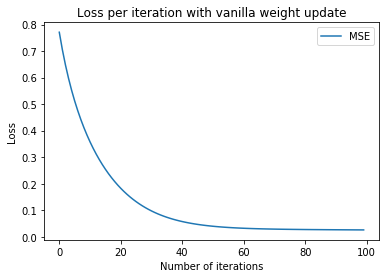

In [20]:
no_of_epochs = 100
epsilon = 1e-7
w = np.ones(9)*0.1
type(w[0])
vanilla_loss = backprapogation_with_vanilla(X,y,w,no_of_epochs)

## 2. Algorithm with momentum update of weights :

In [21]:
def initialize_velocity(grad_wt):
    velocity = []
    learning_rate = 0.0001
    v = 0
    mu = 0.9
    # Initialize velocity
    for l in range(len(grad_wt)):
        v = mu * v - learning_rate * grad_wt[l]
        velocity.append(v)   
    return velocity

In [22]:
def momentum_weight_update(wo,grad_wt):
    up_wt = []
    velocity = initialize_velocity(grad_wt)
    
    for r in range(len(wo)):
        up_weight = wo[r]
        up_weight += velocity[r]
        up_wt.append(up_weight)    
    
    return up_wt 

In [24]:
def backprapogation_with_momentum(X,y,w,epochs):
    main_loss = []
    for r in range(epochs) :
        loss = []
        for d in range(len(X)) :
            
            L_loss,_,output_dict = foreward_propagation(X[d],y[d],w)
            gradient_w = backward_propagation(X[d],y[d],w,output_dict)
            grad_wt = [ v for v in gradient_w.values()]
            new_wt = momentum_weight_update(w,grad_wt)
            w = new_wt
            loss.append(L_loss)
            
        main_loss.append(np.mean(loss))
        print("Epoch: %d, Loss: %.3f" %(r+1, np.mean(loss)))
    
    # Plot loss in each iteration
    plt.figure()
    plt.plot(np.array(main_loss), label='MSE')
    plt.title("Loss per iteration with momentum weight update")
    plt.xlabel("Number of iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    return main_loss

Epoch: 1, Loss: 0.737
Epoch: 2, Loss: 0.618
Epoch: 3, Loss: 0.524
Epoch: 4, Loss: 0.448
Epoch: 5, Loss: 0.384
Epoch: 6, Loss: 0.331
Epoch: 7, Loss: 0.286
Epoch: 8, Loss: 0.247
Epoch: 9, Loss: 0.214
Epoch: 10, Loss: 0.186
Epoch: 11, Loss: 0.162
Epoch: 12, Loss: 0.141
Epoch: 13, Loss: 0.123
Epoch: 14, Loss: 0.107
Epoch: 15, Loss: 0.094
Epoch: 16, Loss: 0.083
Epoch: 17, Loss: 0.073
Epoch: 18, Loss: 0.065
Epoch: 19, Loss: 0.058
Epoch: 20, Loss: 0.052
Epoch: 21, Loss: 0.047
Epoch: 22, Loss: 0.042
Epoch: 23, Loss: 0.039
Epoch: 24, Loss: 0.036
Epoch: 25, Loss: 0.033
Epoch: 26, Loss: 0.031
Epoch: 27, Loss: 0.029
Epoch: 28, Loss: 0.027
Epoch: 29, Loss: 0.026
Epoch: 30, Loss: 0.025
Epoch: 31, Loss: 0.024
Epoch: 32, Loss: 0.023
Epoch: 33, Loss: 0.023
Epoch: 34, Loss: 0.022
Epoch: 35, Loss: 0.022
Epoch: 36, Loss: 0.021
Epoch: 37, Loss: 0.021
Epoch: 38, Loss: 0.021
Epoch: 39, Loss: 0.020
Epoch: 40, Loss: 0.020
Epoch: 41, Loss: 0.020
Epoch: 42, Loss: 0.020
Epoch: 43, Loss: 0.020
Epoch: 44, Loss: 0.0

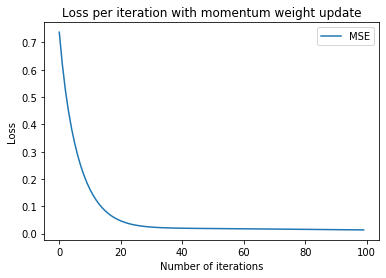

In [25]:
no_of_epochs = 100
epsilon = 1e-7
momentum_loss = backprapogation_with_momentum(X,y,w,no_of_epochs)

## 3. Algorithm with Adam update of weights :

In [57]:
def adam_weight_update(w,grad_wt):
    eps = 1e-8
    beta1 = 0.9
    beta2 = 0.999
    learning_rate = 0.0001
    
    up_wt = []
    m= 0
    v= 0
    t = 0
    for r in range(len(w)):
        t+=1
        m = beta1 * m + (1-beta1) * grad_wt[r]
        m_t = m / (1-beta1**t)
        v = beta2 * v + (1-beta2) * (grad_wt[r]**2)
        v_t = v / (1-beta2**t)
        up_weight = w[r]
        up_weight += (-learning_rate * m_t)/(np.sqrt(v_t) + eps)
        up_wt.append(up_weight)    
    
    return up_wt

In [61]:
def backprapogation_with_adam(X,y,w,epochs):
    main_loss = []
    for r in range(epochs) :
        loss = []
        for d in range(len(X)) :
            
            L_loss,_,output_dict = foreward_propagation(X[d],y[d],w)
            gradient_w = backward_propagation(X[d],y[d],w,output_dict)
            grad_wt = [ v for v in gradient_w.values()]
            new_wt = adam_weight_update(w,grad_wt)
            w = new_wt
            loss.append(L_loss)
            
        main_loss.append(np.mean(loss))
        print("Epoch: %d, Loss: %.3f" %(r+1, np.mean(loss)))
    
    # Plot loss in each iteration
    plt.figure()
    plt.plot(np.array(main_loss), label='mse')
    plt.title("Loss per iteration with adam weight update")
    plt.xlabel("Number of iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    return main_loss

Epoch: 1, Loss: 0.762
Epoch: 2, Loss: 0.680
Epoch: 3, Loss: 0.605
Epoch: 4, Loss: 0.540
Epoch: 5, Loss: 0.483
Epoch: 6, Loss: 0.434
Epoch: 7, Loss: 0.393
Epoch: 8, Loss: 0.357
Epoch: 9, Loss: 0.324
Epoch: 10, Loss: 0.295
Epoch: 11, Loss: 0.268
Epoch: 12, Loss: 0.243
Epoch: 13, Loss: 0.219
Epoch: 14, Loss: 0.196
Epoch: 15, Loss: 0.174
Epoch: 16, Loss: 0.154
Epoch: 17, Loss: 0.135
Epoch: 18, Loss: 0.116
Epoch: 19, Loss: 0.099
Epoch: 20, Loss: 0.084
Epoch: 21, Loss: 0.069
Epoch: 22, Loss: 0.056
Epoch: 23, Loss: 0.045
Epoch: 24, Loss: 0.035
Epoch: 25, Loss: 0.026
Epoch: 26, Loss: 0.019
Epoch: 27, Loss: 0.013
Epoch: 28, Loss: 0.009
Epoch: 29, Loss: 0.006
Epoch: 30, Loss: 0.004
Epoch: 31, Loss: 0.002
Epoch: 32, Loss: 0.002
Epoch: 33, Loss: 0.001
Epoch: 34, Loss: 0.001
Epoch: 35, Loss: 0.001
Epoch: 36, Loss: 0.001
Epoch: 37, Loss: 0.001
Epoch: 38, Loss: 0.000
Epoch: 39, Loss: 0.000
Epoch: 40, Loss: 0.000
Epoch: 41, Loss: 0.000
Epoch: 42, Loss: 0.000
Epoch: 43, Loss: 0.000
Epoch: 44, Loss: 0.0

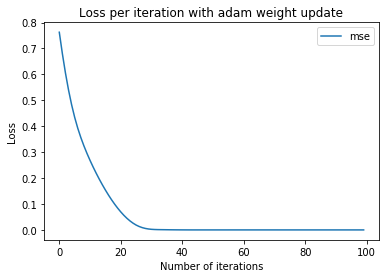

In [62]:
no_of_epochs = 100
epsilon = 1e-7
adagrad_loss = backprapogation_with_adam(X,y,w,no_of_epochs)

### Comparision plot between epochs and loss with different optimizers


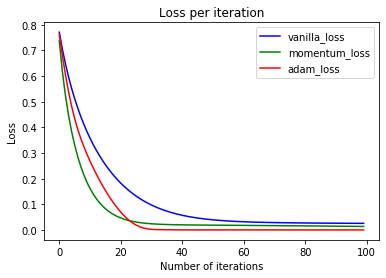

In [63]:
plt.figure()
plt.plot(np.array(vanilla_loss), label='vanilla_loss',color = 'b')
plt.plot(np.array(momentum_loss), label='momentum_loss',color = 'g')
plt.plot(np.array(adagrad_loss), label='adam_loss',color = 'r')
plt.title("Loss per iteration")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

Observation :
         I have observed that , in three optimizers of backpropogation , adam weight update work better than vanilla and 
        momentum. The loss minimization is good compared to remaining optimizers in nearly 35 to 40 epocchs.